In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from DrawingTool import DrawingTool
from FileHandler import FileHandler
from DataHandler import DataHandler

In [45]:
fileHandler = FileHandler()
data_and_label = fileHandler.readData("data_banknote_authentication.txt")
data, labels = data_and_label[:, :-1], np.array(data_and_label[:, -1], dtype=int)

data_handler = DataHandler()    
train_data, test_data, train_label, test_label =  data_handler.split_train_test(data, labels, 200)
print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(972, 4) (400, 4) (972,) (400,)


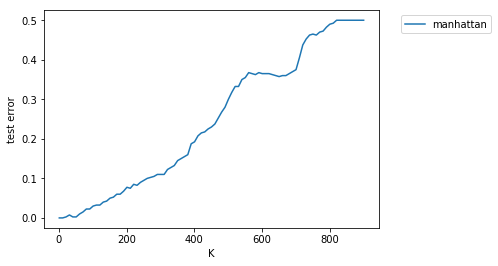

In [46]:
ks = np.arange(1, 902, 10)

manhattan_test_error = np.array([])
for k in ks:        
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(train_data, train_label)

    predicted_label = knn.predict(test_data)
    test_error = 1 - accuracy_score(test_label, predicted_label)        
    manhattan_test_error = np.append(manhattan_test_error, test_error)


plt.figure()
plt.plot(ks, manhattan_test_error, label='manhattan')
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

plt.xlabel('K')
plt.ylabel('test error')
plt.show()

In [47]:
def argmin_last(np_array):
    min_val = np_array[0]
    index = 0
    for i, v in enumerate(np_array):
        if v <= min_val:
            index = i
    
    return index

optimal_k = ks[argmin_last(manhattan_test_error)]
print("optimal k from knn model with Manhattan Distance: k = {0}".format(optimal_k))

optimal k from knn model with Manhattan Distance: k = 11


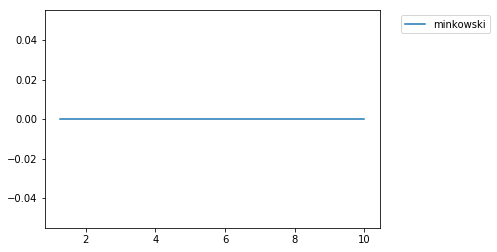

optimal k: 1.2589254117941673


In [48]:
ps = np.power([10]*10, np.arange(0.1, 1.1, 0.1))
minkowski_test_error = np.array([])
for p in ps:        
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski', p=p)
    knn.fit(train_data, train_label)
    predicted_label = knn.predict(test_data)

    test_error = 1 - accuracy_score(test_label, predicted_label)
    minkowski_test_error = np.append(minkowski_test_error, test_error)

plt.figure()
plt.plot(ps, minkowski_test_error, label='minkowski')
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()

optimal_k = ps[np.argmin(minkowski_test_error)]
print("optimal k: {0}".format(optimal_k))

# To train KNN model with Mahalanobis distance

## Attention
When using mahalanobis, keep in mind the meaning of parameter used in computation of Mahalanobis distance. In my opinion, the Mahalanobis distance requires variables following mutivariated distribution

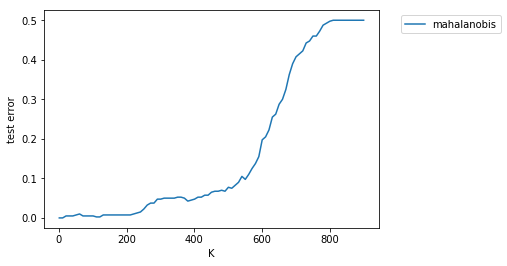

In [76]:

ks = np.arange(1, 902, 10)

mahalanobis_test_error = np.array([])
for k in ks:        
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': np.cov(train_data, rowvar=False)})
    knn.fit(train_data, train_label)

    predicted_label = knn.predict(test_data)
    test_error = 1 - accuracy_score(test_label, predicted_label)        
    mahalanobis_test_error = np.append(mahalanobis_test_error, test_error)

plt.figure()
plt.plot(ks, mahalanobis_test_error, label='mahalanobis')
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

plt.xlabel('K')
plt.ylabel('test error')
plt.show()